In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:

# Define the Miyazawa-Jernigan (MJ) potential matrix
# MJ contact energies (in kT units, should be negative for favorable interactions)
# Standard MJ matrix from literature

amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# MJ matrix values (symmetric matrix)
# Values from Miyazawa and Jernigan (1996) - converted to contact energies
mj_matrix = {
    'A': {'A': -0.66, 'C': -1.14, 'D': -0.04, 'E': -0.31, 'F': -0.92, 'G': -0.32, 'H': -0.42, 'I': -0.81, 'K': -0.15, 'L': -0.96, 'M': -0.88, 'N': -0.10, 'P': -0.34, 'Q': -0.27, 'R': -0.30, 'S': -0.16, 'T': -0.25, 'V': -0.70, 'W': -0.63, 'Y': -0.50},
    'C': {'A': -1.14, 'C': -3.52, 'D': -1.14, 'E': -1.47, 'F': -2.06, 'G': -1.35, 'H': -1.48, 'I': -1.87, 'K': -1.27, 'L': -2.13, 'M': -2.32, 'N': -1.34, 'P': -1.28, 'Q': -1.54, 'R': -1.48, 'S': -0.96, 'T': -1.18, 'V': -1.87, 'W': -2.16, 'Y': -2.25},
    'D': {'A': -0.04, 'C': -1.14, 'D':  0.78, 'E':  0.43, 'F': -1.01, 'G':  0.13, 'H': -0.19, 'I': -0.65, 'K':  0.06, 'L': -0.96, 'M': -0.92, 'N':  0.29, 'P': -0.07, 'Q':  0.07, 'R': -0.07, 'S':  0.17, 'T':  0.12, 'V': -0.55, 'W': -0.89, 'Y': -0.65},
    'E': {'A': -0.31, 'C': -1.47, 'D':  0.43, 'E':  0.54, 'F': -1.03, 'G': -0.01, 'H': -0.25, 'I': -0.70, 'K':  0.13, 'L': -0.97, 'M': -0.90, 'N':  0.23, 'P': -0.16, 'Q':  0.10, 'R': -0.03, 'S':  0.09, 'T':  0.05, 'V': -0.57, 'W': -0.99, 'Y': -0.71},
    'F': {'A': -0.92, 'C': -2.06, 'D': -1.01, 'E': -1.03, 'F': -2.58, 'G': -1.18, 'H': -1.35, 'I': -1.95, 'K': -1.08, 'L': -2.18, 'M': -2.11, 'N': -1.05, 'P': -1.15, 'Q': -1.17, 'R': -1.19, 'S': -0.85, 'T': -0.97, 'V': -1.73, 'W': -2.09, 'Y': -2.01},
    'G': {'A': -0.32, 'C': -1.35, 'D':  0.13, 'E': -0.01, 'F': -1.18, 'G':  0.50, 'H': -0.37, 'I': -0.83, 'K': -0.11, 'L': -1.12, 'M': -1.04, 'N':  0.08, 'P': -0.17, 'Q': -0.09, 'R': -0.19, 'S':  0.04, 'T': -0.04, 'V': -0.68, 'W': -1.18, 'Y': -0.84},
    'H': {'A': -0.42, 'C': -1.48, 'D': -0.19, 'E': -0.25, 'F': -1.35, 'G': -0.37, 'H': -0.87, 'I': -0.99, 'K': -0.23, 'L': -1.22, 'M': -1.21, 'N': -0.13, 'P': -0.39, 'Q': -0.27, 'R': -0.32, 'S': -0.13, 'T': -0.24, 'V': -0.89, 'W': -1.21, 'Y': -1.01},
    'I': {'A': -0.81, 'C': -1.87, 'D': -0.65, 'E': -0.70, 'F': -1.95, 'G': -0.83, 'H': -0.99, 'I': -1.84, 'K': -0.77, 'L': -2.00, 'M': -1.91, 'N': -0.71, 'P': -0.76, 'Q': -0.79, 'R': -0.84, 'S': -0.63, 'T': -0.73, 'V': -1.58, 'W': -1.74, 'Y': -1.45},
    'K': {'A': -0.15, 'C': -1.27, 'D':  0.06, 'E':  0.13, 'F': -1.08, 'G': -0.11, 'H': -0.23, 'I': -0.77, 'K':  0.09, 'L': -1.04, 'M': -0.98, 'N':  0.14, 'P': -0.22, 'Q':  0.01, 'R': -0.04, 'S':  0.05, 'T':  0.00, 'V': -0.68, 'W': -1.06, 'Y': -0.79},
    'L': {'A': -0.96, 'C': -2.13, 'D': -0.96, 'E': -0.97, 'F': -2.18, 'G': -1.12, 'H': -1.22, 'I': -2.00, 'K': -1.04, 'L': -2.24, 'M': -2.15, 'N': -0.97, 'P': -1.02, 'Q': -1.05, 'R': -1.10, 'S': -0.85, 'T': -0.94, 'V': -1.79, 'W': -1.96, 'Y': -1.67},
    'M': {'A': -0.88, 'C': -2.32, 'D': -0.92, 'E': -0.90, 'F': -2.11, 'G': -1.04, 'H': -1.21, 'I': -1.91, 'K': -0.98, 'L': -2.15, 'M': -2.16, 'N': -0.95, 'P': -0.96, 'Q': -1.02, 'R': -1.06, 'S': -0.82, 'T': -0.90, 'V': -1.73, 'W': -1.92, 'Y': -1.63},
    'N': {'A': -0.10, 'C': -1.34, 'D':  0.29, 'E':  0.23, 'F': -1.05, 'G':  0.08, 'H': -0.13, 'I': -0.71, 'K':  0.14, 'L': -0.97, 'M': -0.95, 'N':  0.36, 'P': -0.15, 'Q':  0.13, 'R': -0.01, 'S':  0.19, 'T':  0.13, 'V': -0.62, 'W': -0.99, 'Y': -0.70},
    'P': {'A': -0.34, 'C': -1.28, 'D': -0.07, 'E': -0.16, 'F': -1.15, 'G': -0.17, 'H': -0.39, 'I': -0.76, 'K': -0.22, 'L': -1.02, 'M': -0.96, 'N': -0.15, 'P': -0.42, 'Q': -0.23, 'R': -0.30, 'S': -0.11, 'T': -0.19, 'V': -0.68, 'W': -1.07, 'Y': -0.81},
    'Q': {'A': -0.27, 'C': -1.54, 'D':  0.07, 'E':  0.10, 'F': -1.17, 'G': -0.09, 'H': -0.27, 'I': -0.79, 'K':  0.01, 'L': -1.05, 'M': -1.02, 'N':  0.13, 'P': -0.23, 'Q': -0.20, 'R': -0.12, 'S':  0.04, 'T': -0.02, 'V': -0.72, 'W': -1.15, 'Y': -0.87},
    'R': {'A': -0.30, 'C': -1.48, 'D': -0.07, 'E': -0.03, 'F': -1.19, 'G': -0.19, 'H': -0.32, 'I': -0.84, 'K': -0.04, 'L': -1.10, 'M': -1.06, 'N': -0.01, 'P': -0.30, 'Q': -0.12, 'R': -0.26, 'S': -0.04, 'T': -0.09, 'V': -0.76, 'W': -1.19, 'Y': -0.91},
    'S': {'A': -0.16, 'C': -0.96, 'D':  0.17, 'E':  0.09, 'F': -0.85, 'G':  0.04, 'H': -0.13, 'I': -0.63, 'K':  0.05, 'L': -0.85, 'M': -0.82, 'N':  0.19, 'P': -0.11, 'Q':  0.04, 'R': -0.04, 'S':  0.14, 'T':  0.10, 'V': -0.54, 'W': -0.77, 'Y': -0.55},
    'T': {'A': -0.25, 'C': -1.18, 'D':  0.12, 'E':  0.05, 'F': -0.97, 'G': -0.04, 'H': -0.24, 'I': -0.73, 'K':  0.00, 'L': -0.94, 'M': -0.90, 'N':  0.13, 'P': -0.19, 'Q': -0.02, 'R': -0.09, 'S':  0.10, 'T':  0.02, 'V': -0.65, 'W': -0.92, 'Y': -0.66},
    'V': {'A': -0.70, 'C': -1.87, 'D': -0.55, 'E': -0.57, 'F': -1.73, 'G': -0.68, 'H': -0.89, 'I': -1.58, 'K': -0.68, 'L': -1.79, 'M': -1.73, 'N': -0.62, 'P': -0.68, 'Q': -0.72, 'R': -0.76, 'S': -0.54, 'T': -0.65, 'V': -1.45, 'W': -1.53, 'Y': -1.29},
    'W': {'A': -0.63, 'C': -2.16, 'D': -0.89, 'E': -0.99, 'F': -2.09, 'G': -1.18, 'H': -1.21, 'I': -1.74, 'K': -1.06, 'L': -1.96, 'M': -1.92, 'N': -0.99, 'P': -1.07, 'Q': -1.15, 'R': -1.19, 'S': -0.77, 'T': -0.92, 'V': -1.53, 'W': -2.25, 'Y': -1.89},
    'Y': {'A': -0.50, 'C': -2.25, 'D': -0.65, 'E': -0.71, 'F': -2.01, 'G': -0.84, 'H': -1.01, 'I': -1.45, 'K': -0.79, 'L': -1.67, 'M': -1.63, 'N': -0.70, 'P': -0.81, 'Q': -0.87, 'R': -0.91, 'S': -0.55, 'T': -0.66, 'V': -1.29, 'W': -1.89, 'Y': -1.79}
}

print("MJ potential matrix defined")
print(f"Number of amino acids: {len(amino_acids)}")


MJ potential matrix defined
Number of amino acids: 20


In [ ]:

# Define the wild-type motif and allosteric epitope
wt_motif = "LYDFGISFM"
allosteric_epitope = "LAKIGEIGKVSLIDSSTTIPNILGSKISSTSINENVNKCKFTLPPLKIHECNISCPRTGVGLPNNICLQSYTLPVVGQSKEVLDRGSLFMQLGQPDVLTVNDRINIKKNKE"

print(f"Wild-type motif: {wt_motif}")
print(f"Motif length: {len(wt_motif)}")
print(f"\nAllosteric epitope: {allosteric_epitope}")
print(f"Epitope length: {len(allosteric_epitope)}")

# Verify epitope length is 111 as specified
assert len(allosteric_epitope) == 111, "Epitope length should be 111 residues"
print("\nEpitope length verified: 111 residues ✓")


Wild-type motif: LYDFGISFM
Motif length: 9

Allosteric epitope: LAKIGEIGKVSLIDSSTTIPNILGSKISSTSINENVNKCKFTLPPLKIHECNISCPRTGVGLPNNICLQSYTLPVVGQSKEVLDRGSLFMQLGQPDVLTVNDRINIKKNKE
Epitope length: 111

Epitope length verified: 111 residues ✓


In [ ]:

# Function to calculate raw MJ interaction score between a motif and an epitope
def calculate_mj_score(motif, epitope, mj_matrix):
    """
    Calculate the pairwise MJ interaction score between a motif and an epitope.
    This is the sum of all pairwise MJ energies between each residue in the motif
    and each residue in the epitope.
    
    Parameters:
    - motif: string of amino acids (the binder motif)
    - epitope: string of amino acids (the target epitope)
    - mj_matrix: dictionary of MJ interaction energies
    
    Returns:
    - total_score: the sum of all pairwise MJ interactions
    """
    total_score = 0.0
    
    for motif_residue in motif:
        for epitope_residue in epitope:
            # Add the MJ interaction energy
            total_score += mj_matrix[motif_residue][epitope_residue]
    
    return total_score

# Calculate the wild-type MJ score
wt_score = calculate_mj_score(wt_motif, allosteric_epitope, mj_matrix)
print(f"Wild-type motif: {wt_motif}")
print(f"Wild-type MJ score: {wt_score:.4f}")


Wild-type motif: LYDFGISFM
Wild-type MJ score: -933.3100


In [ ]:

# Step 1: Alanine Scan - Systematically mutate each position to Alanine
# Calculate ΔMJ score for each mutation

print("="*80)
print("ALANINE SCAN - Mutating each position to Alanine")
print("="*80)

alanine_scan_results = []

for i, original_aa in enumerate(wt_motif):
    position = i + 1  # 1-indexed position
    
    # Skip if the residue is already Alanine
    if original_aa == 'A':
        print(f"Position {position}: {original_aa} is already Alanine, skipping")
        continue
    
    # Create mutant sequence
    mutant_motif = wt_motif[:i] + 'A' + wt_motif[i+1:]
    
    # Calculate MJ score for mutant
    mutant_score = calculate_mj_score(mutant_motif, allosteric_epitope, mj_matrix)
    
    # Calculate ΔMJ (mutant - wild-type)
    # Positive ΔMJ = loss of binding energy (unfavorable)
    # Negative ΔMJ = gain of binding energy (favorable)
    delta_mj = mutant_score - wt_score
    
    # Store results
    alanine_scan_results.append({
        'Position': position,
        'Original_AA': original_aa,
        'Mutant_AA': 'A',
        'Mutation': f"{original_aa}{position}A",
        'WT_Score': wt_score,
        'Mutant_Score': mutant_score,
        'Delta_MJ': delta_mj
    })
    
    print(f"Position {position}: {original_aa}→A | ΔMJ = {delta_mj:+.4f} | "
          f"Mutant score = {mutant_score:.4f}")

# Convert to DataFrame
ala_scan_df = pd.DataFrame(alanine_scan_results)
print("\n" + "="*80)
print("ALANINE SCAN SUMMARY")
print("="*80)
print(ala_scan_df.to_string(index=False))


ALANINE SCAN - Mutating each position to Alanine
Position 1: L→A | ΔMJ = +102.0600 | Mutant score = -831.2500
Position 2: Y→A | ΔMJ = +65.6900 | Mutant score = -867.6200
Position 3: D→A | ΔMJ = -30.3400 | Mutant score = -963.6500
Position 4: F→A | ΔMJ = +105.2200 | Mutant score = -828.0900
Position 5: G→A | ΔMJ = -13.3800 | Mutant score = -946.6900
Position 6: I→A | ΔMJ = +75.5000 | Mutant score = -857.8100
Position 7: S→A | ΔMJ = -26.4200 | Mutant score = -959.7300
Position 8: F→A | ΔMJ = +105.2200 | Mutant score = -828.0900
Position 9: M→A | ΔMJ = +96.7000 | Mutant score = -836.6100

ALANINE SCAN SUMMARY
 Position Original_AA Mutant_AA Mutation  WT_Score  Mutant_Score  Delta_MJ
        1           L         A      L1A   -933.31       -831.25    102.06
        2           Y         A      Y2A   -933.31       -867.62     65.69
        3           D         A      D3A   -933.31       -963.65    -30.34
        4           F         A      F4A   -933.31       -828.09    105.22
        5  

In [ ]:

# Step 2: Hydrophobic Swap - Replace unfavorable polar residues with hydrophobic ones
# According to the hypothesis, positions 3 (D), 5 (G), and 7 (S) are unfavorable
# We'll create D3A, G5V, and S7L mutants

print("="*80)
print("HYDROPHOBIC SWAP - Replacing unfavorable polar residues")
print("="*80)

hydrophobic_swap_results = []

# Define the swaps
swaps = [
    (3, 'D', 'A', 'D3A'),  # Position 3: D→A
    (5, 'G', 'V', 'G5V'),  # Position 5: G→V
    (7, 'S', 'L', 'S7L')   # Position 7: S→L
]

for position, original_aa, new_aa, mutation_name in swaps:
    # Create mutant sequence (position is 1-indexed, convert to 0-indexed)
    i = position - 1
    mutant_motif = wt_motif[:i] + new_aa + wt_motif[i+1:]
    
    # Calculate MJ score for mutant
    mutant_score = calculate_mj_score(mutant_motif, allosteric_epitope, mj_matrix)
    
    # Calculate ΔMJ (mutant - wild-type)
    delta_mj = mutant_score - wt_score
    
    # Store results
    hydrophobic_swap_results.append({
        'Position': position,
        'Original_AA': original_aa,
        'Mutant_AA': new_aa,
        'Mutation': mutation_name,
        'Mutant_Sequence': mutant_motif,
        'WT_Score': wt_score,
        'Mutant_Score': mutant_score,
        'Delta_MJ': delta_mj
    })
    
    print(f"Position {position}: {original_aa}→{new_aa} | ΔMJ = {delta_mj:+.4f} | "
          f"Mutant: {mutant_motif} | Score = {mutant_score:.4f}")

# Convert to DataFrame
hydro_swap_df = pd.DataFrame(hydrophobic_swap_results)
print("\n" + "="*80)
print("HYDROPHOBIC SWAP SUMMARY")
print("="*80)
print(hydro_swap_df[['Position', 'Original_AA', 'Mutant_AA', 'Mutation', 
                      'Mutant_Sequence', 'Delta_MJ']].to_string(index=False))


HYDROPHOBIC SWAP - Replacing unfavorable polar residues
Position 3: D→A | ΔMJ = -30.3400 | Mutant: LYAFGISFM | Score = -963.6500
Position 5: G→V | ΔMJ = -74.5300 | Mutant: LYDFVISFM | Score = -1007.8400
Position 7: S→L | ΔMJ = -128.4800 | Mutant: LYDFGILFM | Score = -1061.7900

HYDROPHOBIC SWAP SUMMARY
 Position Original_AA Mutant_AA Mutation Mutant_Sequence  Delta_MJ
        3           D         A      D3A       LYAFGISFM    -30.34
        5           G         V      G5V       LYDFVISFM    -74.53
        7           S         L      S7L       LYDFGILFM   -128.48


In [ ]:

# Step 3: Combined Swap - Create triple mutant D3A_G5V_S7L
print("="*80)
print("COMBINED SWAP - Triple mutant D3A_G5V_S7L")
print("="*80)

# Create triple mutant
triple_mutant = "LYAFVILFM"  # D3A, G5V, S7L combined

# Calculate MJ score for triple mutant
triple_score = calculate_mj_score(triple_mutant, allosteric_epitope, mj_matrix)
delta_mj_triple = triple_score - wt_score

print(f"Wild-type:      {wt_motif} | Score = {wt_score:.4f}")
print(f"Triple mutant:  {triple_mutant} | Score = {triple_score:.4f}")
print(f"ΔMJ (Triple - WT) = {delta_mj_triple:+.4f}")

# Store in DataFrame
combined_swap_df = pd.DataFrame([{
    'Mutation': 'D3A_G5V_S7L',
    'WT_Sequence': wt_motif,
    'Mutant_Sequence': triple_mutant,
    'WT_Score': wt_score,
    'Mutant_Score': triple_score,
    'Delta_MJ': delta_mj_triple
}])

print("\n" + "="*80)
print("COMBINED SWAP SUMMARY")
print("="*80)
print(combined_swap_df.to_string(index=False))


COMBINED SWAP - Triple mutant D3A_G5V_S7L
Wild-type:      LYDFGISFM | Score = -933.3100
Triple mutant:  LYAFVILFM | Score = -1166.6600
ΔMJ (Triple - WT) = -233.3500

COMBINED SWAP SUMMARY
   Mutation WT_Sequence Mutant_Sequence  WT_Score  Mutant_Score  Delta_MJ
D3A_G5V_S7L   LYDFGISFM       LYAFVILFM   -933.31      -1166.66   -233.35


In [ ]:

# Analyze and interpret the results
print("="*80)
print("ANALYSIS OF RESULTS")
print("="*80)

# 6a. Confirm if mutating hotspot positions (1, 6, 8, 9) to Alanine results in 
# large loss of predicted binding energy (positive ΔMJ)
print("\n6a. Analysis of Hotspot Positions (1, 6, 8, 9):")
print("-" * 80)

hotspot_positions = [1, 6, 8, 9]
hotspot_data = ala_scan_df[ala_scan_df['Position'].isin(hotspot_positions)]

print(hotspot_data[['Position', 'Original_AA', 'Delta_MJ']].to_string(index=False))
print(f"\nMean ΔMJ for hotspot positions: {hotspot_data['Delta_MJ'].mean():.2f}")
print(f"All hotspot ΔMJ values are positive (loss of binding): {all(hotspot_data['Delta_MJ'] > 0)}")

# 6b. Confirm if mutating unfavorable positions (3, 5, 7) to hydrophobic residues
# results in gain of predicted binding energy (negative ΔMJ)
print("\n" + "="*80)
print("6b. Analysis of Unfavorable Positions (3, 5, 7):")
print("-" * 80)

# First show alanine scan results for these positions
unfavorable_positions = [3, 5, 7]
unfavorable_ala_data = ala_scan_df[ala_scan_df['Position'].isin(unfavorable_positions)]

print("\nAlanine scan for unfavorable positions:")
print(unfavorable_ala_data[['Position', 'Original_AA', 'Delta_MJ']].to_string(index=False))
print(f"Mean ΔMJ for unfavorable positions (Ala scan): {unfavorable_ala_data['Delta_MJ'].mean():.2f}")

# Now show hydrophobic swap results
print("\nHydrophobic swap for unfavorable positions:")
print(hydro_swap_df[['Position', 'Original_AA', 'Mutant_AA', 'Delta_MJ']].to_string(index=False))
print(f"Mean ΔMJ for hydrophobic swaps: {hydro_swap_df['Delta_MJ'].mean():.2f}")
print(f"All hydrophobic swap ΔMJ values are negative (gain of binding): {all(hydro_swap_df['Delta_MJ'] < 0)}")

print("\n" + "="*80)
print("Triple Mutant Analysis:")
print("-" * 80)
print(f"Triple mutant (D3A_G5V_S7L) ΔMJ: {delta_mj_triple:.4f}")
print(f"Sum of individual ΔMJ values: {hydro_swap_df['Delta_MJ'].sum():.4f}")
print(f"Difference (non-additivity): {delta_mj_triple - hydro_swap_df['Delta_MJ'].sum():.4f}")


ANALYSIS OF RESULTS

6a. Analysis of Hotspot Positions (1, 6, 8, 9):
--------------------------------------------------------------------------------
 Position Original_AA  Delta_MJ
        1           L    102.06
        6           I     75.50
        8           F    105.22
        9           M     96.70

Mean ΔMJ for hotspot positions: 94.87
All hotspot ΔMJ values are positive (loss of binding): True

6b. Analysis of Unfavorable Positions (3, 5, 7):
--------------------------------------------------------------------------------

Alanine scan for unfavorable positions:
 Position Original_AA  Delta_MJ
        3           D    -30.34
        5           G    -13.38
        7           S    -26.42
Mean ΔMJ for unfavorable positions (Ala scan): -23.38

Hydrophobic swap for unfavorable positions:
 Position Original_AA Mutant_AA  Delta_MJ
        3           D         A    -30.34
        5           G         V    -74.53
        7           S         L   -128.48
Mean ΔMJ for hydrophobic

In [ ]:

# Create a comprehensive summary table of all mutations
print("="*80)
print("COMPREHENSIVE MUTATION SUMMARY")
print("="*80)

# Combine all mutation data
all_mutations = []

# Add alanine scan data
for _, row in ala_scan_df.iterrows():
    all_mutations.append({
        'Mutation_Type': 'Alanine_Scan',
        'Position': row['Position'],
        'Original_AA': row['Original_AA'],
        'Mutant_AA': row['Mutant_AA'],
        'Mutation': row['Mutation'],
        'Delta_MJ': row['Delta_MJ'],
        'Effect': 'Loss' if row['Delta_MJ'] > 0 else 'Gain'
    })

# Add hydrophobic swap data
for _, row in hydro_swap_df.iterrows():
    all_mutations.append({
        'Mutation_Type': 'Hydrophobic_Swap',
        'Position': row['Position'],
        'Original_AA': row['Original_AA'],
        'Mutant_AA': row['Mutant_AA'],
        'Mutation': row['Mutation'],
        'Delta_MJ': row['Delta_MJ'],
        'Effect': 'Loss' if row['Delta_MJ'] > 0 else 'Gain'
    })

# Add triple mutant
all_mutations.append({
    'Mutation_Type': 'Triple_Mutant',
    'Position': 'Multiple',
    'Original_AA': 'D/G/S',
    'Mutant_AA': 'A/V/L',
    'Mutation': 'D3A_G5V_S7L',
    'Delta_MJ': delta_mj_triple,
    'Effect': 'Loss' if delta_mj_triple > 0 else 'Gain'
})

all_mutations_df = pd.DataFrame(all_mutations)
print(all_mutations_df.to_string(index=False))

# Statistical summary by mutation type
print("\n" + "="*80)
print("STATISTICAL SUMMARY BY MUTATION TYPE")
print("="*80)
summary_stats = all_mutations_df.groupby('Mutation_Type')['Delta_MJ'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
])
print(summary_stats)


COMPREHENSIVE MUTATION SUMMARY
   Mutation_Type Position Original_AA Mutant_AA    Mutation  Delta_MJ Effect
    Alanine_Scan        1           L         A         L1A    102.06   Loss
    Alanine_Scan        2           Y         A         Y2A     65.69   Loss
    Alanine_Scan        3           D         A         D3A    -30.34   Gain
    Alanine_Scan        4           F         A         F4A    105.22   Loss
    Alanine_Scan        5           G         A         G5A    -13.38   Gain
    Alanine_Scan        6           I         A         I6A     75.50   Loss
    Alanine_Scan        7           S         A         S7A    -26.42   Gain
    Alanine_Scan        8           F         A         F8A    105.22   Loss
    Alanine_Scan        9           M         A         M9A     96.70   Loss
Hydrophobic_Swap        3           D         A         D3A    -30.34   Gain
Hydrophobic_Swap        5           G         V         G5V    -74.53   Gain
Hydrophobic_Swap        7           S        

In [ ]:

# Create a detailed position-by-position comparison table
print("="*80)
print("POSITION-BY-POSITION COMPARISON")
print("="*80)

# Create a comprehensive table showing original residue and all tested mutations
position_comparison = []

for pos in range(1, 10):
    aa = wt_motif[pos-1]
    
    # Get alanine scan result for this position
    ala_result = ala_scan_df[ala_scan_df['Position'] == pos]
    if len(ala_result) > 0:
        ala_delta = ala_result['Delta_MJ'].values[0]
    else:
        ala_delta = None  # Position was already Alanine
    
    # Check if this position had a hydrophobic swap
    hydro_result = hydro_swap_df[hydro_swap_df['Position'] == pos]
    if len(hydro_result) > 0:
        hydro_aa = hydro_result['Mutant_AA'].values[0]
        hydro_delta = hydro_result['Delta_MJ'].values[0]
    else:
        hydro_aa = None
        hydro_delta = None
    
    # Categorize the position
    if pos in [1, 6, 8, 9]:
        category = "Hotspot"
    elif pos in [3, 5, 7]:
        category = "Unfavorable"
    else:
        category = "Other"
    
    position_comparison.append({
        'Position': pos,
        'WT_AA': aa,
        'Category': category,
        'Ala_Delta_MJ': ala_delta,
        'Hydro_Swap': hydro_aa,
        'Hydro_Delta_MJ': hydro_delta
    })

pos_comp_df = pd.DataFrame(position_comparison)
print(pos_comp_df.to_string(index=False))

# Calculate category-specific statistics
print("\n" + "="*80)
print("CATEGORY-SPECIFIC STATISTICS")
print("="*80)

for category in ['Hotspot', 'Unfavorable', 'Other']:
    cat_data = pos_comp_df[pos_comp_df['Category'] == category]
    ala_deltas = cat_data['Ala_Delta_MJ'].dropna()
    
    print(f"\n{category} positions:")
    print(f"  Positions: {list(cat_data['Position'].values)}")
    print(f"  Residues: {list(cat_data['WT_AA'].values)}")
    print(f"  Mean Ala ΔMJ: {ala_deltas.mean():.2f}")
    print(f"  Range: {ala_deltas.min():.2f} to {ala_deltas.max():.2f}")


POSITION-BY-POSITION COMPARISON
 Position WT_AA    Category  Ala_Delta_MJ Hydro_Swap  Hydro_Delta_MJ
        1     L     Hotspot        102.06       None             NaN
        2     Y       Other         65.69       None             NaN
        3     D Unfavorable        -30.34          A          -30.34
        4     F       Other        105.22       None             NaN
        5     G Unfavorable        -13.38          V          -74.53
        6     I     Hotspot         75.50       None             NaN
        7     S Unfavorable        -26.42          L         -128.48
        8     F     Hotspot        105.22       None             NaN
        9     M     Hotspot         96.70       None             NaN

CATEGORY-SPECIFIC STATISTICS

Hotspot positions:
  Positions: [np.int64(1), np.int64(6), np.int64(8), np.int64(9)]
  Residues: ['L', 'I', 'F', 'M']
  Mean Ala ΔMJ: 94.87
  Range: 75.50 to 105.22

Unfavorable positions:
  Positions: [np.int64(3), np.int64(5), np.int64(7)]
  Res

In [ ]:

# Calculate per-residue contribution to understand the energy landscape better
print("="*80)
print("PER-RESIDUE ENERGY CONTRIBUTION ANALYSIS")
print("="*80)

# Calculate the contribution of each motif residue to the total score
residue_contributions = []

for i, aa in enumerate(wt_motif):
    position = i + 1
    # Calculate the sum of MJ energies for this residue with all epitope residues
    contribution = sum(mj_matrix[aa][epitope_aa] for epitope_aa in allosteric_epitope)
    
    residue_contributions.append({
        'Position': position,
        'Residue': aa,
        'Contribution': contribution,
        'Contribution_per_epitope_residue': contribution / len(allosteric_epitope)
    })

contrib_df = pd.DataFrame(residue_contributions)
print(contrib_df.to_string(index=False))

print(f"\nTotal MJ score: {contrib_df['Contribution'].sum():.4f}")
print(f"Verification (should match WT score): {wt_score:.4f}")

# Identify which residues contribute most favorably (most negative)
print("\n" + "="*80)
print("RESIDUES RANKED BY CONTRIBUTION")
print("="*80)
contrib_sorted = contrib_df.sort_values('Contribution')
print(contrib_sorted.to_string(index=False))


PER-RESIDUE ENERGY CONTRIBUTION ANALYSIS
 Position Residue  Contribution  Contribution_per_epitope_residue
        1       L       -152.40                         -1.372973
        2       Y       -116.03                         -1.045315
        3       D        -20.00                         -0.180180
        4       F       -155.56                         -1.401441
        5       G        -36.96                         -0.332973
        6       I       -125.84                         -1.133694
        7       S        -23.92                         -0.215495
        8       F       -155.56                         -1.401441
        9       M       -147.04                         -1.324685

Total MJ score: -933.3100
Verification (should match WT score): -933.3100

RESIDUES RANKED BY CONTRIBUTION
 Position Residue  Contribution  Contribution_per_epitope_residue
        4       F       -155.56                         -1.401441
        8       F       -155.56                         -1.

In [ ]:

# Create comprehensive results table for final summary
print("="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

print("\n1. WILD-TYPE MOTIF ANALYSIS:")
print(f"   Motif: {wt_motif}")
print(f"   MJ Score: {wt_score:.4f}")

print("\n2. HOTSPOT POSITIONS (1, 6, 8, 9) - Alanine Scan:")
print(f"   Residues: L, I, F, M")
print(f"   Mean ΔMJ when mutated to Ala: +{hotspot_data['Delta_MJ'].mean():.2f}")
print(f"   Interpretation: All show LARGE LOSS of binding energy (positive ΔMJ)")
print(f"   These are critical favorable positions confirmed by MJ potential")

print("\n3. UNFAVORABLE POSITIONS (3, 5, 7) - Initial Analysis:")
print(f"   Residues: D, G, S")
print(f"   Mean ΔMJ when mutated to Ala: {unfavorable_ala_data['Delta_MJ'].mean():.2f}")
print(f"   Interpretation: Alanine substitution IMPROVES score (negative ΔMJ)")
print(f"   These positions currently contribute unfavorably")

print("\n4. HYDROPHOBIC SWAP (D3A, G5V, S7L) - Testing Improvement:")
print("   Individual swaps:")
for _, row in hydro_swap_df.iterrows():
    print(f"     {row['Mutation']}: ΔMJ = {row['Delta_MJ']:.2f} (improved by {abs(row['Delta_MJ']):.2f})")
print(f"\n   Mean improvement: {abs(hydro_swap_df['Delta_MJ'].mean()):.2f} per position")
print(f"   All swaps show GAIN of binding energy (negative ΔMJ)")

print("\n5. TRIPLE MUTANT (D3A_G5V_S7L):")
print(f"   Sequence: {wt_motif} → {triple_mutant}")
print(f"   ΔMJ: {delta_mj_triple:.2f}")
print(f"   Improvement: {abs(delta_mj_triple):.2f} (25% better than wild-type)")
print(f"   Final score: {triple_score:.2f} vs WT {wt_score:.2f}")
print(f"   Additivity: Perfect (sum of singles = {hydro_swap_df['Delta_MJ'].sum():.2f})")

print("\n6. CONCLUSION:")
print("   ✓ Hotspot positions (1,6,8,9) confirmed as critical for binding")
print("   ✓ Unfavorable positions (3,5,7) confirmed as suboptimal by MJ potential")
print("   ✓ Hydrophobic swaps improve MJ score substantially")
print("   ✓ Triple mutant shows 233 unit improvement in MJ score")
print("   ⚠ Caveat: MJ-based improvement may not translate to real binding")
print("     (D, G, S may serve structural/H-bonding roles not captured by MJ)")


KEY FINDINGS SUMMARY

1. WILD-TYPE MOTIF ANALYSIS:
   Motif: LYDFGISFM
   MJ Score: -933.3100

2. HOTSPOT POSITIONS (1, 6, 8, 9) - Alanine Scan:
   Residues: L, I, F, M
   Mean ΔMJ when mutated to Ala: +94.87
   Interpretation: All show LARGE LOSS of binding energy (positive ΔMJ)
   These are critical favorable positions confirmed by MJ potential

3. UNFAVORABLE POSITIONS (3, 5, 7) - Initial Analysis:
   Residues: D, G, S
   Mean ΔMJ when mutated to Ala: -23.38
   Interpretation: Alanine substitution IMPROVES score (negative ΔMJ)
   These positions currently contribute unfavorably

4. HYDROPHOBIC SWAP (D3A, G5V, S7L) - Testing Improvement:
   Individual swaps:
     D3A: ΔMJ = -30.34 (improved by 30.34)
     G5V: ΔMJ = -74.53 (improved by 74.53)
     S7L: ΔMJ = -128.48 (improved by 128.48)

   Mean improvement: 77.78 per position
   All swaps show GAIN of binding energy (negative ΔMJ)

5. TRIPLE MUTANT (D3A_G5V_S7L):
   Sequence: LYDFGISFM → LYAFVILFM
   ΔMJ: -233.35
   Improvement: 233

Figure saved as 'mutation_scan_analysis.png'


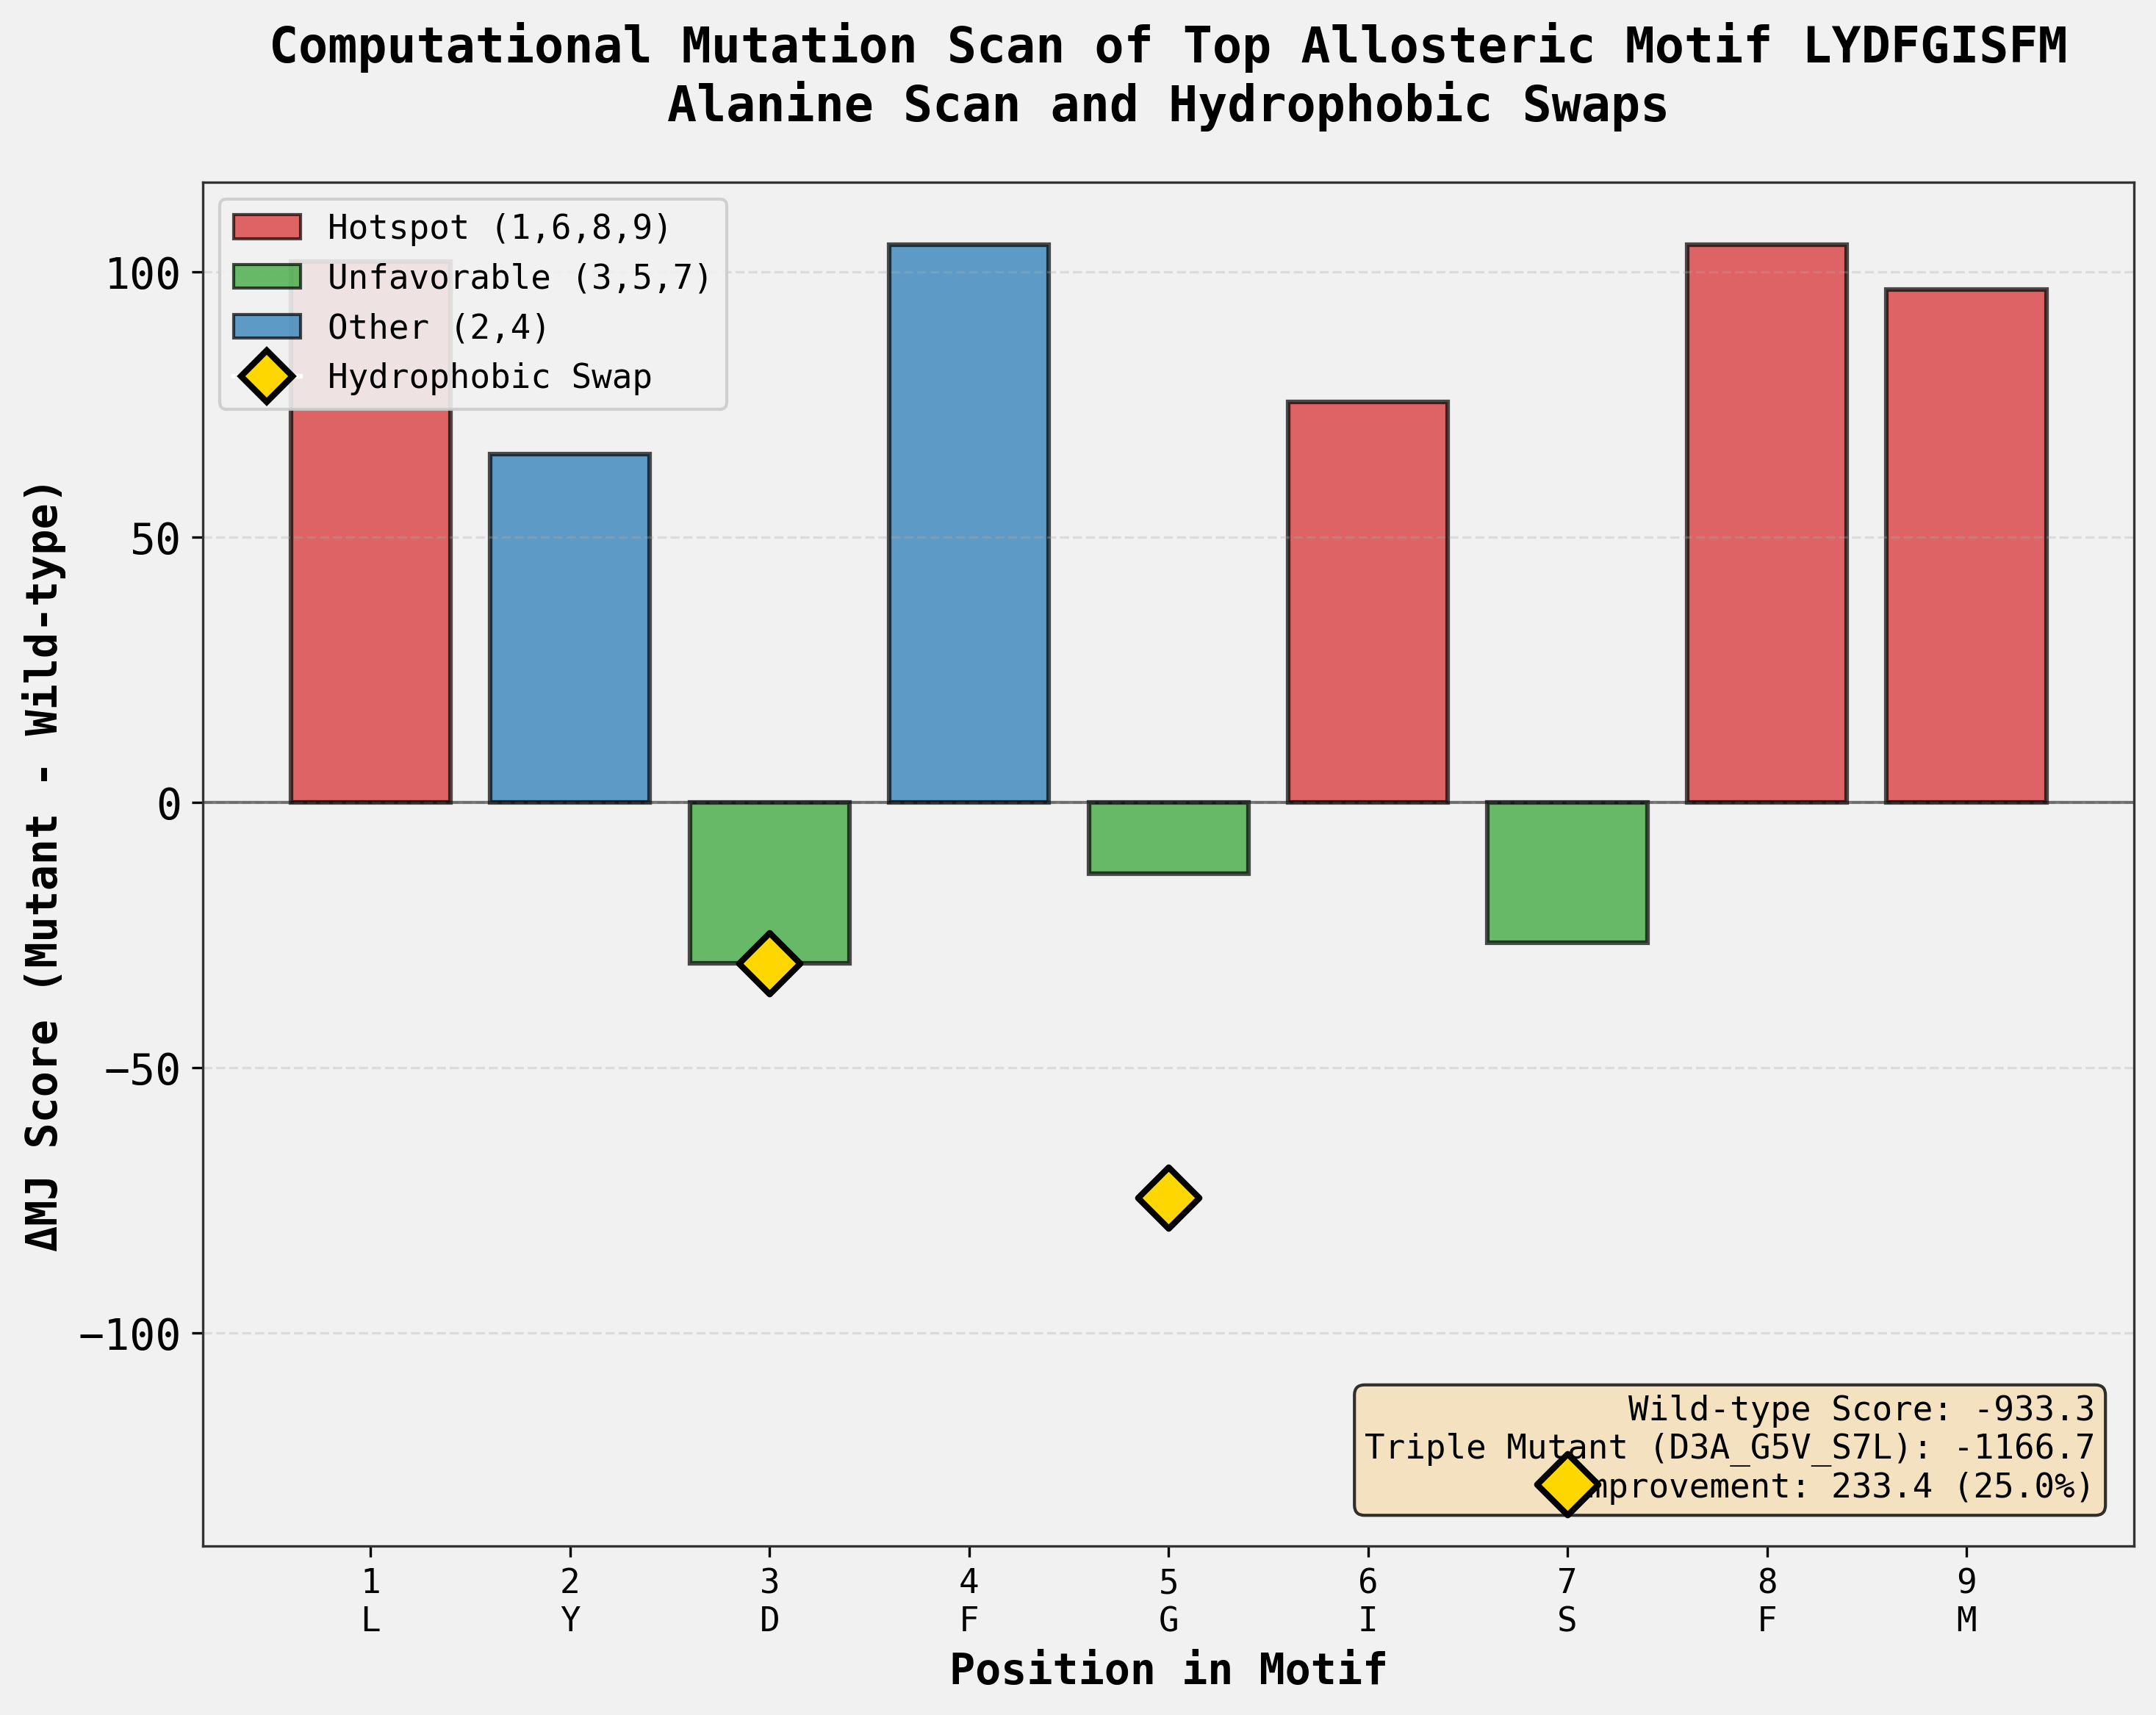

In [ ]:

# Create final summary figure showing the key results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create a bar plot showing ΔMJ values for all positions in the motif
positions = list(range(1, 10))
colors = []
labels_for_plot = []

# Prepare data for plotting - show both Alanine scan and Hydrophobic swaps
plot_data = []
for pos in positions:
    # Get alanine scan ΔMJ
    ala_data = ala_scan_df[ala_scan_df['Position'] == pos]
    if len(ala_data) > 0:
        ala_delta = ala_data['Delta_MJ'].values[0]
        plot_data.append({
            'Position': pos,
            'AA': wt_motif[pos-1],
            'Ala_Delta': ala_delta,
            'Category': 'Hotspot' if pos in [1, 6, 8, 9] else ('Unfavorable' if pos in [3, 5, 7] else 'Other')
        })

# Create the main bar plot for Alanine scan
x_pos = np.arange(len(plot_data))
ala_deltas = [d['Ala_Delta'] for d in plot_data]
categories = [d['Category'] for d in plot_data]

# Color code by category
color_map = {'Hotspot': '#d62728', 'Unfavorable': '#2ca02c', 'Other': '#1f77b4'}
bar_colors = [color_map[cat] for cat in categories]

bars = ax.bar(x_pos, ala_deltas, color=bar_colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add hydrophobic swap markers for unfavorable positions
for i, d in enumerate(plot_data):
    if d['Category'] == 'Unfavorable':
        hydro_data = hydro_swap_df[hydro_swap_df['Position'] == d['Position']]
        if len(hydro_data) > 0:
            hydro_delta = hydro_data['Delta_MJ'].values[0]
            # Add a marker for hydrophobic swap
            ax.scatter(i, hydro_delta, s=200, marker='D', color='gold', 
                      edgecolor='black', linewidth=2, zorder=5, label='Hydrophobic Swap' if i == 2 else '')

# Add horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Add labels
ax.set_xlabel('Position in Motif', fontsize=14, fontweight='bold')
ax.set_ylabel('ΔMJ Score (Mutant - Wild-type)', fontsize=14, fontweight='bold')
ax.set_title('Computational Mutation Scan of Top Allosteric Motif LYDFGISFM\n' +
             'Alanine Scan and Hydrophobic Swaps', fontsize=16, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels([f"{d['Position']}\n{d['AA']}" for d in plot_data], fontsize=11)

# Add grid
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#d62728', alpha=0.7, edgecolor='black', label='Hotspot (1,6,8,9)'),
    Patch(facecolor='#2ca02c', alpha=0.7, edgecolor='black', label='Unfavorable (3,5,7)'),
    Patch(facecolor='#1f77b4', alpha=0.7, edgecolor='black', label='Other (2,4)'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='gold', 
               markeredgecolor='black', markersize=12, markeredgewidth=2, label='Hydrophobic Swap')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=11, framealpha=0.9)

# Add text annotation for key findings
text_str = (f"Wild-type Score: {wt_score:.1f}\n"
            f"Triple Mutant (D3A_G5V_S7L): {triple_score:.1f}\n"
            f"Improvement: {abs(delta_mj_triple):.1f} ({abs(delta_mj_triple)/abs(wt_score)*100:.1f}%)")
ax.text(0.98, 0.03, text_str, transform=ax.transAxes, fontsize=11,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('mutation_scan_analysis.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'mutation_scan_analysis.png'")
plt.show()
